In [1]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random


In [2]:
s=str.maketrans('','',punctuation)
a='salam!@'
a.translate(s)

'salam'

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
stop_word=stopwords.words('english')

In [6]:
negaitve_d=[]
max_len_negaitve=0
for file in os.listdir('data/neg'):
    with open('data/neg/'+file) as f:
        txt=f.read()
    token= word_tokenize(txt)
    t=str.maketrans('','',punctuation)
    token=[w.translate(t) for w in token]
    token=[w for w in token if not  w in stop_word]
    if len(token)> max_len_negaitve:
        max_len_negaitve=len(token)
    doc=' '.join(token)
    negaitve_d.append(' '.join(token))
len(negaitve_d)

1000

In [7]:
max_len_negaitve

1400

In [8]:
posetive_d=[]
max_len_positive=0
for file in os.listdir('data/pos'):
    with open('data/pos/'+file) as f:
        txt=f.read()
    token= word_tokenize(txt)
    t=str.maketrans('','',punctuation)
    token=[w.translate(t) for w in token]
    token=[w for w in token if not  w in stop_word]
    if len(token)> max_len_positive:
        max_len_positive=len(token)
    doc=' '.join(token)
    posetive_d.append(' '.join(token))
len(posetive_d)

1000

In [9]:
max_len_positive

1693

In [10]:
max_len=max(max_len_negaitve,max_len_positive)

In [11]:
random.shuffle(negaitve_d)
random.shuffle(posetive_d)

x_train=negaitve_d[:800]+posetive_d[:800]

In [12]:
len(x_train)

1600

In [13]:
x_train[-1]

' magic town   jimmy stewart peak form playing pollster heads  perfect  town gauge reactions sorts issues polltakers care  however  time progresses  finds falling love town  woman   begins see wrong  plot standard stuff  important  film like  calibre actors make break  obviously  since stewart stars  practically nonissue  great film  usual  something always manages endearing  even deceiving town folk  always side  desperately want see goals come fruitition  film directed longtime frank capra scriptwriter  shows  type feelgood picture capra famous  time  end  shows screen  everything wrapped nicely  loose ends  virtually every character gets happy ending  deserve one  anyway   age cynicism  refreshing see movie upbeat   magic town  delightfully entertaining motion picture  believe old movies slowpaced  welladvised check one '

In [14]:
y_train=[0 for _ in range(800)] +[1 for _ in range(800)]

In [15]:
len(y_train)

1600

In [16]:
x_test=negaitve_d[800:]+posetive_d[800:]
len(x_test)

400

In [17]:
y_test=[0 for _ in range(200)] +[1 for _ in range(200)]

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten,Embedding,Conv1D,MaxPool1D,Dropout
from tensorflow.keras.layers import concatenate

In [19]:
max_len

1693

In [20]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_train)

In [21]:
tokenizer

In [33]:
vocab_len=len(tokenizer.word_index)+1
vocab_len

40464

In [34]:
encoded=tokenizer.texts_to_sequences(x_train)
encoded[10]

[5268,
 4790,
 5533,
 342,
 5269,
 499,
 3115,
 2403,
 11347,
 33,
 220,
 2253,
 168,
 3421,
 239,
 8520,
 1127,
 242,
 3421,
 320,
 284,
 23887,
 6871,
 6872,
 342,
 249,
 859,
 3421,
 4791,
 23888,
 788,
 4404,
 3422,
 12849,
 23889,
 1550,
 304,
 4075,
 1058,
 18172,
 2308,
 2566,
 10209,
 951,
 1497,
 4229,
 23890,
 458,
 82,
 2649,
 2116,
 1093,
 290,
 9275,
 3905,
 1345,
 3756,
 5829,
 170,
 11,
 134,
 739,
 9276,
 15,
 1402,
 601,
 340,
 3421,
 3422,
 23891,
 4590,
 9277,
 137,
 323,
 2076,
 559,
 342,
 3421,
 44,
 102,
 839,
 5018,
 23892,
 3422,
 111,
 2650,
 23893,
 105,
 121,
 248,
 115,
 11348,
 864,
 3421,
 10210,
 12850,
 583,
 1299,
 793,
 251,
 3757,
 18173,
 7314,
 8521,
 504,
 19,
 342,
 10210,
 293,
 79,
 78,
 122,
 3422,
 10210,
 79,
 152,
 5534,
 779,
 2254,
 11348,
 19,
 531,
 214,
 5270,
 14959,
 620,
 1843,
 3423,
 191,
 1723,
 23894,
 18173,
 211,
 4,
 3218,
 467,
 917,
 4405]

In [35]:
paded=pad_sequences(encoded,maxlen=max_len,padding='post')
paded

array([[ 6854,  4998,  4999, ...,     0,     0,     0],
       [   20,   111,    40, ...,     0,     0,     0],
       [ 3013,   139,  5000, ...,     0,     0,     0],
       ...,
       [    1,   237,  2995, ...,     0,     0,     0],
       [    4, 11152,  2842, ...,     0,     0,     0],
       [ 1301,   238,  1654, ...,     0,     0,     0]],
      shape=(1600, 1693), dtype=int32)

In [36]:
paded.shape

(1600, 1693)

In [37]:
encoded_test=tokenizer.texts_to_sequences(x_test)
paded_test=pad_sequences(encoded_test,maxlen=max_len,padding='post')

In [38]:
input_1=Input(shape=(max_len,),)
embedding=Embedding(vocab_len,100)(input_1)
conv1=Conv1D(filters=32,kernel_size=4,activation='relu')(embedding)
drop_1=Dropout(0.5)(conv1)
max_pol1=MaxPool1D(pool_size=2)(drop_1)
flat=Flatten()(max_pol1)
dense1=Dense(10,activation='relu')(flat)
output=Dense(1,activation='sigmoid')(dense1)

In [39]:
model=Model(inputs=[input_1],outputs=output)


In [40]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1693)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 1693, 100)      │     4,046,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1690, 32)       │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1690, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 845, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 27040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │       270,410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,329,653 (16.52 MB)

 Trainable params: 4,329,653 (16.52 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
import numpy as np


In [43]:
model.fit([paded],np.array(y_train),epochs=10,batch_size=20,validation_data=([paded_test],np.array(y_test)))

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5406 - loss: 0.6883 - val_accuracy: 0.5550 - val_loss: 0.6838
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7794 - loss: 0.5226 - val_accuracy: 0.7550 - val_loss: 0.5130
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9812 - loss: 0.0843 - val_accuracy: 0.8450 - val_loss: 0.3741
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.8450 - val_loss: 0.3697
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8525 - val_loss: 0.3622
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8600 - val_loss: 0.3672
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 1.0000 - loss: 8.4379e-04 - val_accuracy: 0.8600 - val_loss: 0.3632
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 1.0000 - loss: 6.4474e-04 - val_accuracy: 0.

In [44]:
model.save('txt_ai.h5')

In [45]:
import pickle
with open ('token.text','wb') as f:
    pickle.dump(tokenizer,f)

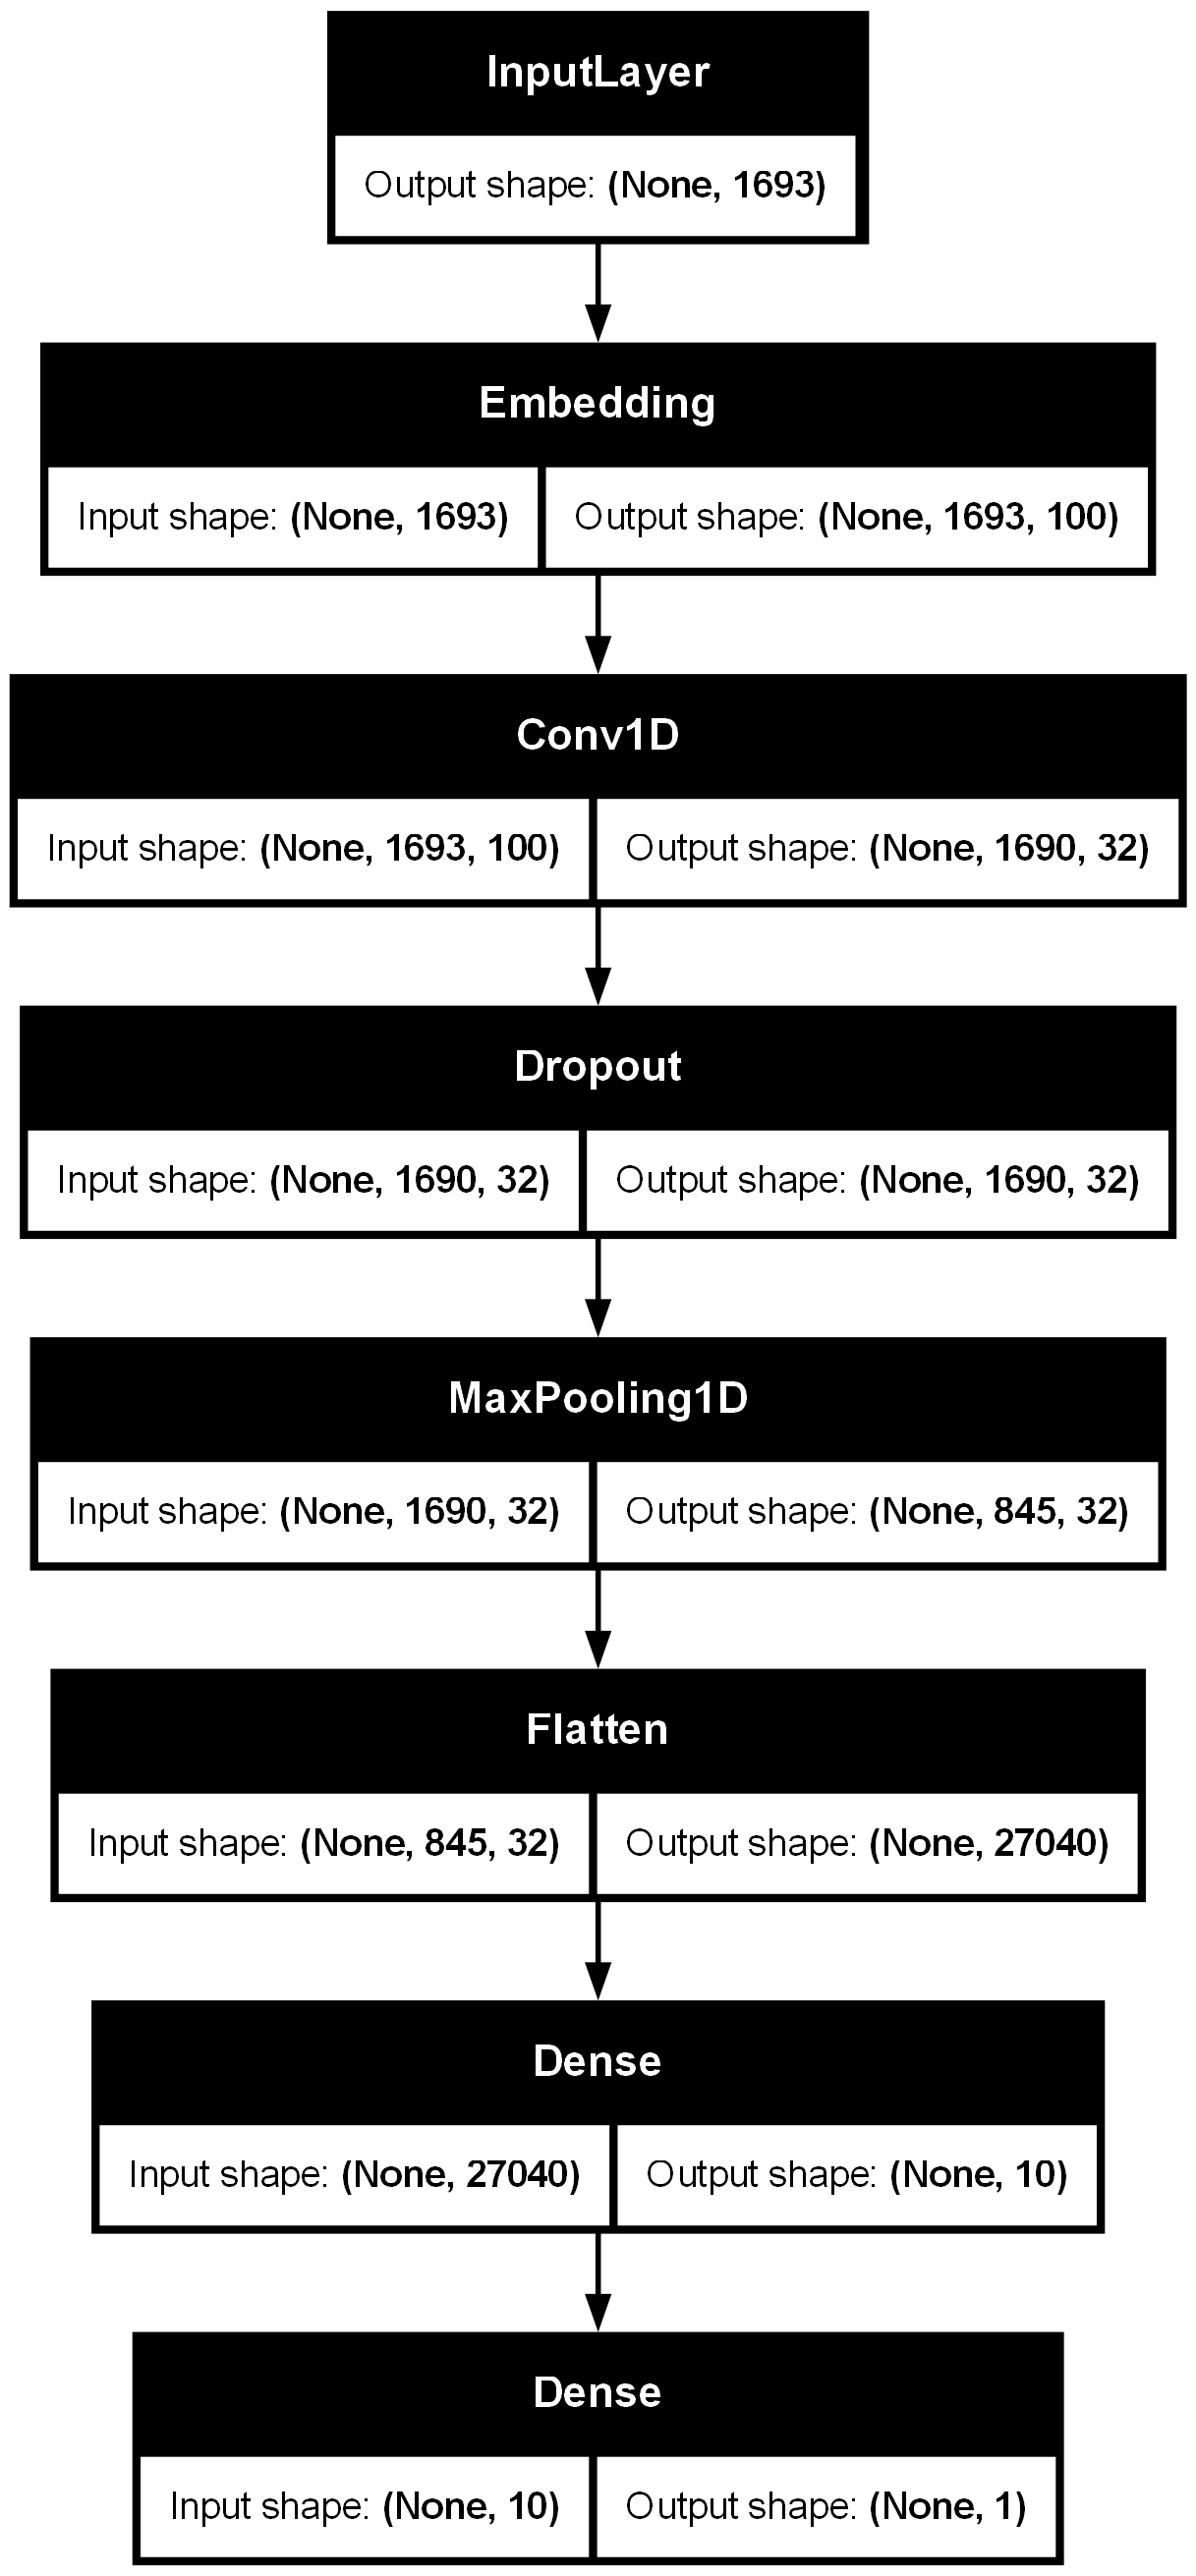

In [46]:
plot_model(model,show_shapes=True)

In [47]:
from tensorflow.keras.models import load_model
model=load_model('txt_ai.h5')

In [48]:
with open ('token.text','rb') as f:
    tokenizer=pickle.load(f)

In [50]:
tokenizer.word_index

{'film': 1,
 'nt': 2,
 'movie': 3,
 'one': 4,
 'like': 5,
 'even': 6,
 'good': 7,
 'time': 8,
 'would': 9,
 'story': 10,
 'much': 11,
 'get': 12,
 'character': 13,
 'also': 14,
 'characters': 15,
 'two': 16,
 'see': 17,
 'first': 18,
 'way': 19,
 'well': 20,
 'could': 21,
 'make': 22,
 'really': 23,
 'life': 24,
 'plot': 25,
 'little': 26,
 'films': 27,
 'people': 28,
 'bad': 29,
 'scene': 30,
 'never': 31,
 'man': 32,
 'best': 33,
 'new': 34,
 'scenes': 35,
 'many': 36,
 'movies': 37,
 'know': 38,
 'great': 39,
 'another': 40,
 'us': 41,
 'director': 42,
 'love': 43,
 'go': 44,
 'action': 45,
 'end': 46,
 'still': 47,
 'work': 48,
 'something': 49,
 'seems': 50,
 'however': 51,
 'made': 52,
 'makes': 53,
 'big': 54,
 'world': 55,
 'back': 56,
 'every': 57,
 'though': 58,
 'enough': 59,
 'around': 60,
 'better': 61,
 'take': 62,
 'gets': 63,
 'audience': 64,
 'real': 65,
 'going': 66,
 'seen': 67,
 'think': 68,
 'performance': 69,
 'role': 70,
 'funny': 71,
 'last': 72,
 'years': 73,
 

model.predict()